<a href="https://colab.research.google.com/github/Amparwen/PB_Future24/blob/main/EstadisticasHangman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerias y ficheros

Importar librerias


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Cargar documentos con los datos

In [4]:

# words_df=pd.read_csv('/content/drive/MyDrive/PYTHON/words.csv', header=None, names=['word'])
rounds_df=pd.read_csv('/content/drive/MyDrive/PYTHON/rounds_in_games.csv')
game_df=pd.read_csv('/content/drive/MyDrive/PYTHON/games.csv')

# WORDS


En este caso es el gráfico de distribución de cantidad de intentos por número de letras.


Se generaría uno por cada longitud. Entonces tendríamos uno de la distribución de palabras de 5 letras, por ejemplo. De esta manera se puede observar cuál es el comportamiento de los jugadores y en términos generales, cuántos intentos, o preguntas, necesitan para adivinar la palabra.


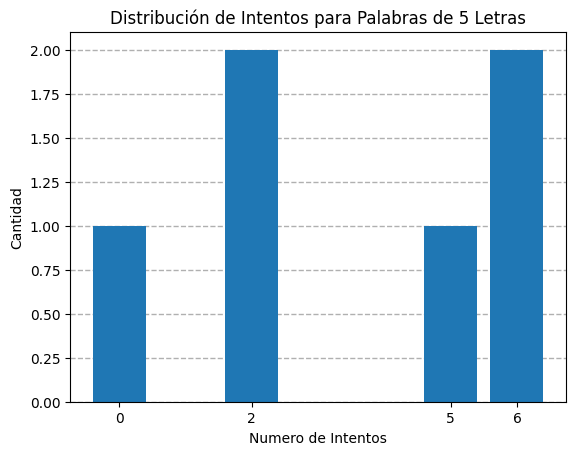

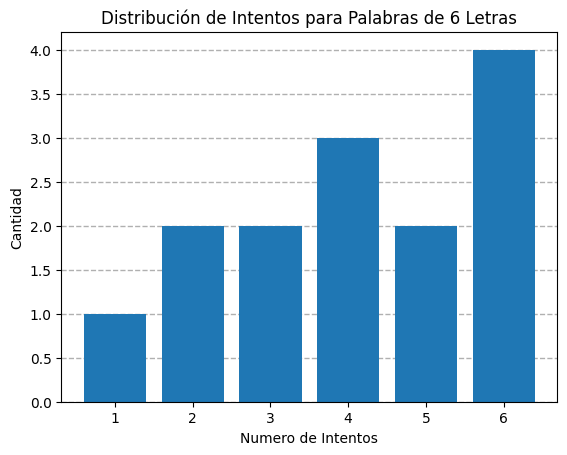

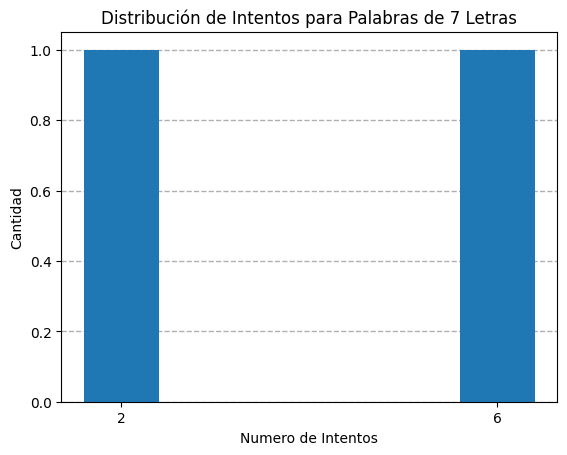

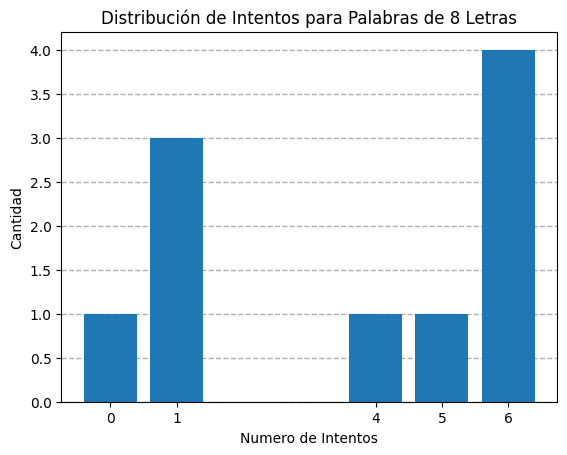

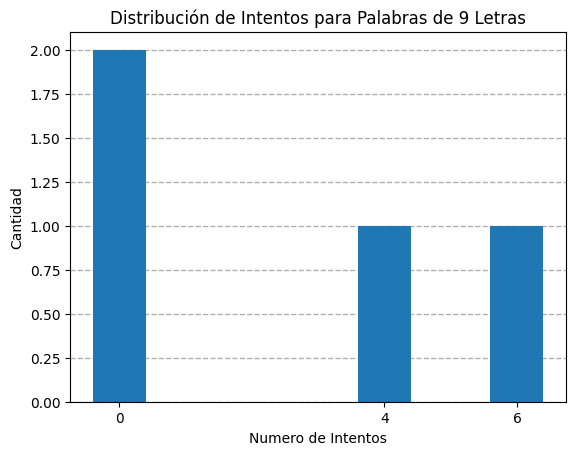

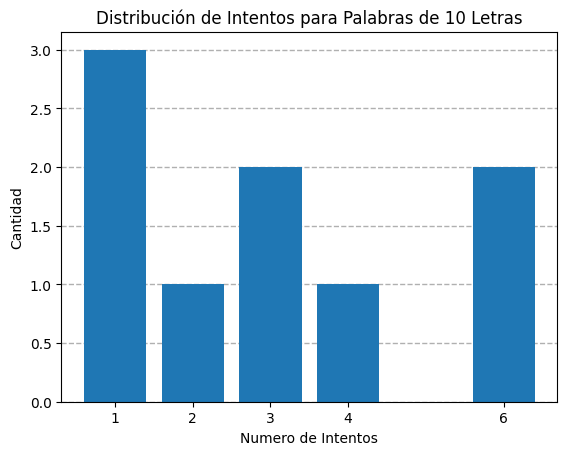

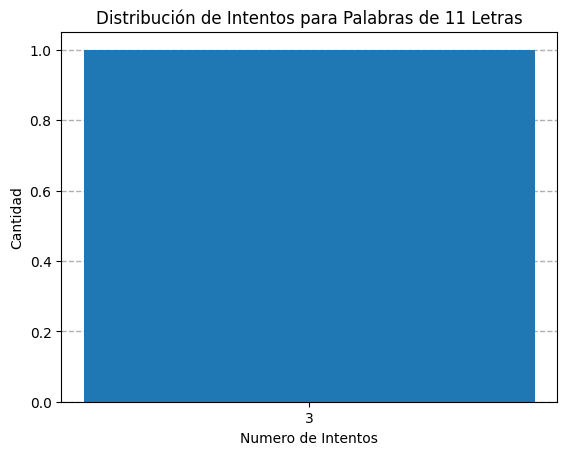

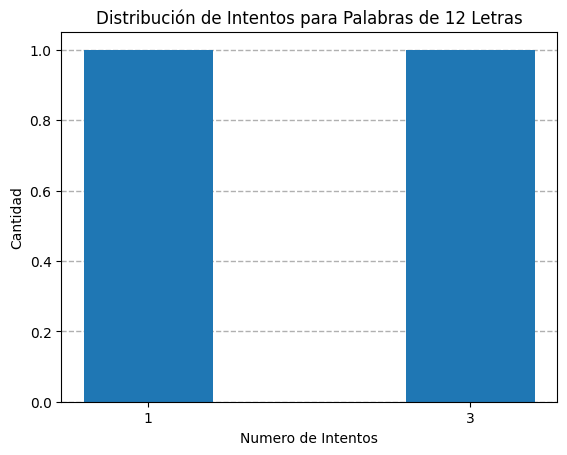

In [108]:
#Añadimos una nueva columna con el numero de letras correspondiente a cada palabra de la ronda
rounds_df['word_length'] = rounds_df['word'].apply(len)

# Agrupamos los datos por 'word_length' y 'user_trys', y contar las ocurrencias (size devuelve Número de filas por cada grupo )
grouped = rounds_df.groupby(['word_length', 'user_tries']).size()
# grouped
# con size obtenemos una serie cuyo índice esta compuesto por más de un valor, como word_length y user_tries,
# para que el conteo sea otra columna, usamos el reset_index y le damos como nombre 'count'

attempt_distribution=grouped.reset_index(name='count')
attempt_distribution
#  Obtenemos las longitudes únicas de palabras
unique_lengths = attempt_distribution['word_length'].unique()

for length in unique_lengths:
  subgroup=attempt_distribution[attempt_distribution['word_length'] == length] #filtramos la tabla attempt_distribution para que cree el grafico con los valores que corresponda a la longitud de palabra
  #matplotlib.pyplot. bar ( x , y , ancho = 0.8 , abajo = Ninguno , * , align = 'center' , datos = Ninguno , ** kwargs )[fuente]
  plt.bar(subgroup['user_tries'], subgroup['count'],zorder=2 )
  # Añadimos títulos y etiquetas
  plt.title(f'Distribución de Intentos para Palabras de {length} Letras')
  plt.xlabel('Numero de Intentos')
  plt.ylabel('Cantidad')
  plt.xticks(subgroup['user_tries'])  # usamos xticks para que el refleje en nº exacto de intentos
  plt.grid(True, axis='y', linestyle='--', linewidth=1, zorder=0)#zorder = capa para que se vea por debajo de las barras
  plt.show()




# ROUNDS

Número de usuarios diferentes que han participado en alguna partida.

In [34]:
# Con la función unique sacamos la cuenta de los usuarios diferentes que han jugado
unique_users = rounds_df['username'].nunique()
print(f"Número de usuarios diferentes: {unique_users}")

Número de usuarios diferentes: 9


Top 5 de usuarios que más rondas han ganado por partida.

In [10]:
# Hacemos un filtrado para obtener solo aquellos registros que hayan ganado la ronda
winners=rounds_df[rounds_df["victory"] ==True]

# De los datos anteriores contamos cuantas veces ha ganado cada uno de los usuarios y mostramos los 5 primeros
top_winners=winners['username'].value_counts().head(5)

top_winners

username
Jose             9
Jennifer         6
Nerea            6
mm               3
Emilia           3
Luci             2
Homer            2
Michael Scott    2
Tere             1
Name: count, dtype: int64

# GAMES

Top 5 de usuarios con más puntuación final

In [37]:
#Agrupamos por nombre de usuario y sumamos sus puntuaciones finales, mostramos las 5 mayores
game_df.groupby("username")["final_score"].sum().nlargest(5)

username
Jose        9
Jennifer    6
Nerea       6
Emilia      3
mm          3
Name: final_score, dtype: int64

Top 5 de usuarios con más puntuación media (media de la puntuación de sus
partidas) --> para esto debéis jugar varias partidas con un mismo nombre de
usuario

In [38]:
#Agrupamos por nombre de usuario y hacemos la media sus puntuaciones finales, mostramos las 5 mayores
game_df.groupby("username")["final_score"].mean().nlargest(5)

username
Emilia      3.00
Jennifer    3.00
mm          3.00
Jose        2.25
Homer       2.00
Name: final_score, dtype: float64

Distribución de las puntuaciones de las partidas (histograma)

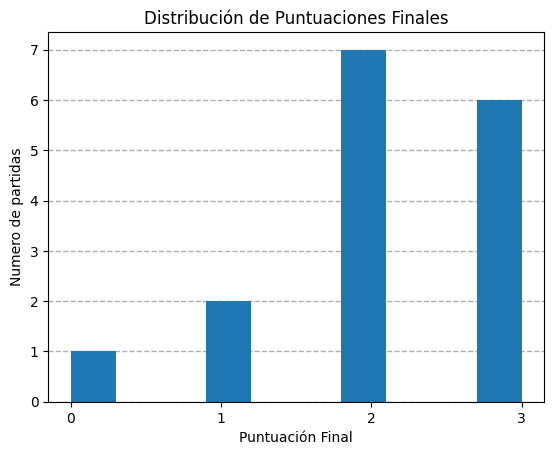

In [107]:
# matplotlib.pyplot. hist ( x , bins = Ninguno , rango = Ninguno , densidad = Falso , pesos = Ninguno , acumulativo = Falso , fondo = Ninguno ,
#  histtype = 'barra' , align = 'mid' , orientación = 'vertical' , ancho = Ninguno , log = False , color = Ninguno , etiqueta = Ninguno , apilado = False ,
#   * , datos = Ninguno , ** kwargs )[fuente]

plt.hist(game_df["final_score"],zorder=2)
plt.title('Distribución de Puntuaciones Finales')
plt.xlabel('Puntuación Final')
plt.ylabel('Numero de partidas')
plt.grid(True, axis='y', linestyle='--', linewidth=1, zorder=0)#zorder = capa para que se vea por debajo de las barras
plt.xticks([0, 1, 2, 3])  # Establece los valores de las posibles puntuaciones finales

plt.show()